In [1]:
# first compile the c modules where the model depends on
from  explain_core.ModulesCompiler import compile_modules;
compile_modules()

# import the model engine and the model interface
from explain_core.ModelEngine import ModelEngine
from explain_core.helpers.Interface import Interface

# instantiate a model engine instance with the 'normal_neonate' model definition
model = ModelEngine("normal_neonate.json")

# get a reference to all the submodels
models = model.models

# instantiate an interface object to interact with the model engine instance
neo = Interface(model)

# enable or disable the physiological submodels
neo.ans(True)
neo.breathing(True)
neo.metabolism(True)
neo.mob(True)

# desiable the extra-corporeal models
neo.placenta(False)
neo.ventilator(False)
neo.ecls(False)
neo.artificial_whomb(False)

# BLOOD PRESSURE EFFECTS
models["Ans"].min_baro = 20.0
models["Ans"].set_baro = 57.5
models["Ans"].max_baro = 100.0

# target vector: heart_rate change
models["Ans"].heart_rate_ref = 140.0
models["Ans"].g_map_hp = -1.88              
models["Ans"].tc_map_hp = 2.0
# hypotension   = (20 - 57.5)  * -1.88 = 70.5       (max increase of heart_rate_ref in bpm)
# hypertension  = (100 - 57.5) * -1.88 = -42.55     (max decrease of the heart_rate_ref in bpm)

# target vector: u_vol -> venous pool
models["Ans"].g_map_ven_pool = 0.0533     
models["Ans"].tc_map_ven_pool = 60.0
# hypotension   = (20 - 57.5)  * 0.0533 = -2.0      (max decrease of u_vol by factor 2.0)
# hypertension  = (100 - 57.5) * 0.0533 = 2.26      (max increase of u_vol by factor 2.26)

# target vector: el_max -> contractility
models["Ans"].g_map_cont = -0.032       
models["Ans"].tc_map_cont = 15.0
# hypotension   = (20 - 57.5)  * -0.032 = 1.2       (max increase of el_max by factor 1.2)
# hypertension  = (100 - 57.5) * -0.032 = -1.36     (max decrease of el_max by factor 1.36)

# target vector: r_for and r_back -> systemic vascular resistance
models["Ans"].g_map_svr = -0.05
models["Ans"].tc_map_svr = 30.0
# hypotension   = (20 - 57.5)  * -0.05 = 1.875      (max increase of r_ans by factor 1.875)
# hypertension  = (100 - 57.5) * -0.05 = -2.125     (max decrease of r_ans by factor 2.125)


#PCO2 EFFECTS
models["Ans"].min_pco2 = 15.0
models["Ans"].set_pco2 = 35
models["Ans"].max_pco2 = 75.0
models["Ans"].minute_volume_ref = 0.66

# target vector : target_minute_volume
# maximum effect on ve with hypocapnia              = (min - set) * gain = (15 - 35) * 0.02 = -0.4 + mv_ref         = mv_min 0.26
# maximum effect on ve with hypercapnia             = (max - set) * gain = (75 - 35) * 0.02 = 0.8  + mv_ref         = mv_max 1.46
models["Ans"].g_pco2_ve = 0.02  
models["Ans"].tc_pco2_ve = 12.0

# target vector : heart_rate
# maximum effect on heart rate with hypocapnia      = (min - set) * gain = (15 - 35) * 0.25 = -5  + heart_rate_ref  = min hr 135
# maximum effect on heart rate with hypercapnia     = (max - set) * gain = (75 - 35) * 0.25 = 10  + heart_rate_ref  = min hr 150
models["Ans"].g_pco2_hp = 0  
models["Ans"].tc_pco2_hp = 60.0

# no effect of pco2 on contractility modeled -> works through pH
models["Ans"].g_pco2_cont = 0.0      
models["Ans"].tc_pco2_cont = 10.0

# no effect of pco2 on venous pool modeled
models["Ans"].g_pco2_venpool = 0.0      
models["Ans"].tc_pco2_venpool = 10.0

# no effect of pco2 on systemic vascular resistance modeled
models["Ans"].g_pco2_svr = 0.0       
models["Ans"].tc_pco2_svr = 10.0

models["Ans"].g_pco2_pvr = 0.0      
models["Ans"].tc_pco2_pvr = 10.0

# PH EFFECTS
models["Ans"].min_ph = 6.9
models["Ans"].set_ph = 7.4
models["Ans"].max_ph = 7.7

# maximum effect on ve with acidosis                = (min - set) * gain = (6.9 - 7.4) * -1.5 = 0.75  + mv_ref   -> mv_max = 0.66 + 0.75 = 1.41
# maximum effect on ve with alkalosis               = (max - set) * gain = (7.7 - 7.4) * -1.5 = -0.45 + mv_ref   -> mv_min = 0.66 - 0.45 = 0.21
models["Ans"].g_ph_ve = -1.5
models["Ans"].tc_ph_ve = 10.0

# maximum effect on heart rate with acidosis        = (min - set) * gain = (6.9 - 7.4) * -20 = 10  + heart_rate_ref  = min hr 150
# maximum effect on heart rate with alkalosis       = (max - set) * gain = (7.7 - 7.4) * -20 = -6  + heart_rate_ref  = min hr 134
models["Ans"].g_ph_hp = 0
models["Ans"].tc_ph_hp = 10.0

# maximum effect on contracility with acidosis      = (min - set) * gain = (6.9 - 7.4) = -0.5 -> if contractility smaller by 20%       -> gain 0.4
# maximum effect on contracility with alkalosis     = (min - set) * gain = (7.7 - 7.4) = 0.3  -> if contractility larger  by 12%       -> gain 0.4
models["Ans"].g_ph_cont = 0 
models["Ans"].tc_ph_cont = 10.0

# no effect of ph on venous pool
models["Ans"].g_ph_venpool = 0.0      
models["Ans"].tc_ph_venpool = 10.0

# no effect of ph on systemic vascular resistance
models["Ans"].g_ph_svr = 0.0       
models["Ans"].tc_ph_svr = 10.0


models["Ans"].g_ph_pvr = 0.0      
models["Ans"].tc_ph_pvr = 10.0


#PO2 EFFECTS
models["Ans"].min_po2 = 30.0
models["Ans"].set_po2 = 80.0
models["Ans"].max_po2 = 103.0

# maximum effect on ve with hypoxia             = (min - set) * gain = (30 - 80)  * -0.0068 = 0.34    + mv_ref    -> mv_max = 0.66 + 0.34  = 1.0
# maximum effect on ve with hyperoxia           = (max - set) * gain = (103 - 80) * -0.0068 = -0.156  + mv_ref    -> mv_min = 0.66 - 0.156 = 0.50
models["Ans"].g_po2_ve = -0.0068     
models["Ans"].tc_po2_ve = 10.0

# maximum effect on heart rate with hypoxia     = (min - set) * gain = (30 - 80) * -0.2 = 10 + heart_rate_ref  = min hr 150
# maximum effect on heart rate with hyperoxia   = (max - set) * gain = (103 - 80) * -0.2 = -4.6  + heart_rate_ref  = min hr 135
models["Ans"].g_po2_hp = -0.2     
models["Ans"].tc_po2_hp = 10.0

# no effect of po2 on contractility modeled
models["Ans"].g_po2_cont = 0.0      
models["Ans"].tc_po2_cont = 10.0

# no effect of po2 on venous pool modeled
models["Ans"].g_po2_venpool = 0.0      
models["Ans"].tc_po2_venpool = 10.0

# no effect of po2 on systemic vascular resistance modeled
models["Ans"].g_po2_svr = 0.0       
models["Ans"].tc_po2_svr = 10.0

models["Ans"].g_po2_pvr = 0.0      
models["Ans"].tc_po2_pvr = 10.0

# stabilize by calculating 60 seconds with fixed resp_rate of 40/min, tidal volume of 16 ml and fixed heart rate of 140 / min
neo.calculate(60)
# 51/34 1600e

 Model 'normal neonate' loaded and initialized correctly.
 Ready in 3.5 sec. Average model step in 0.0291 ms.


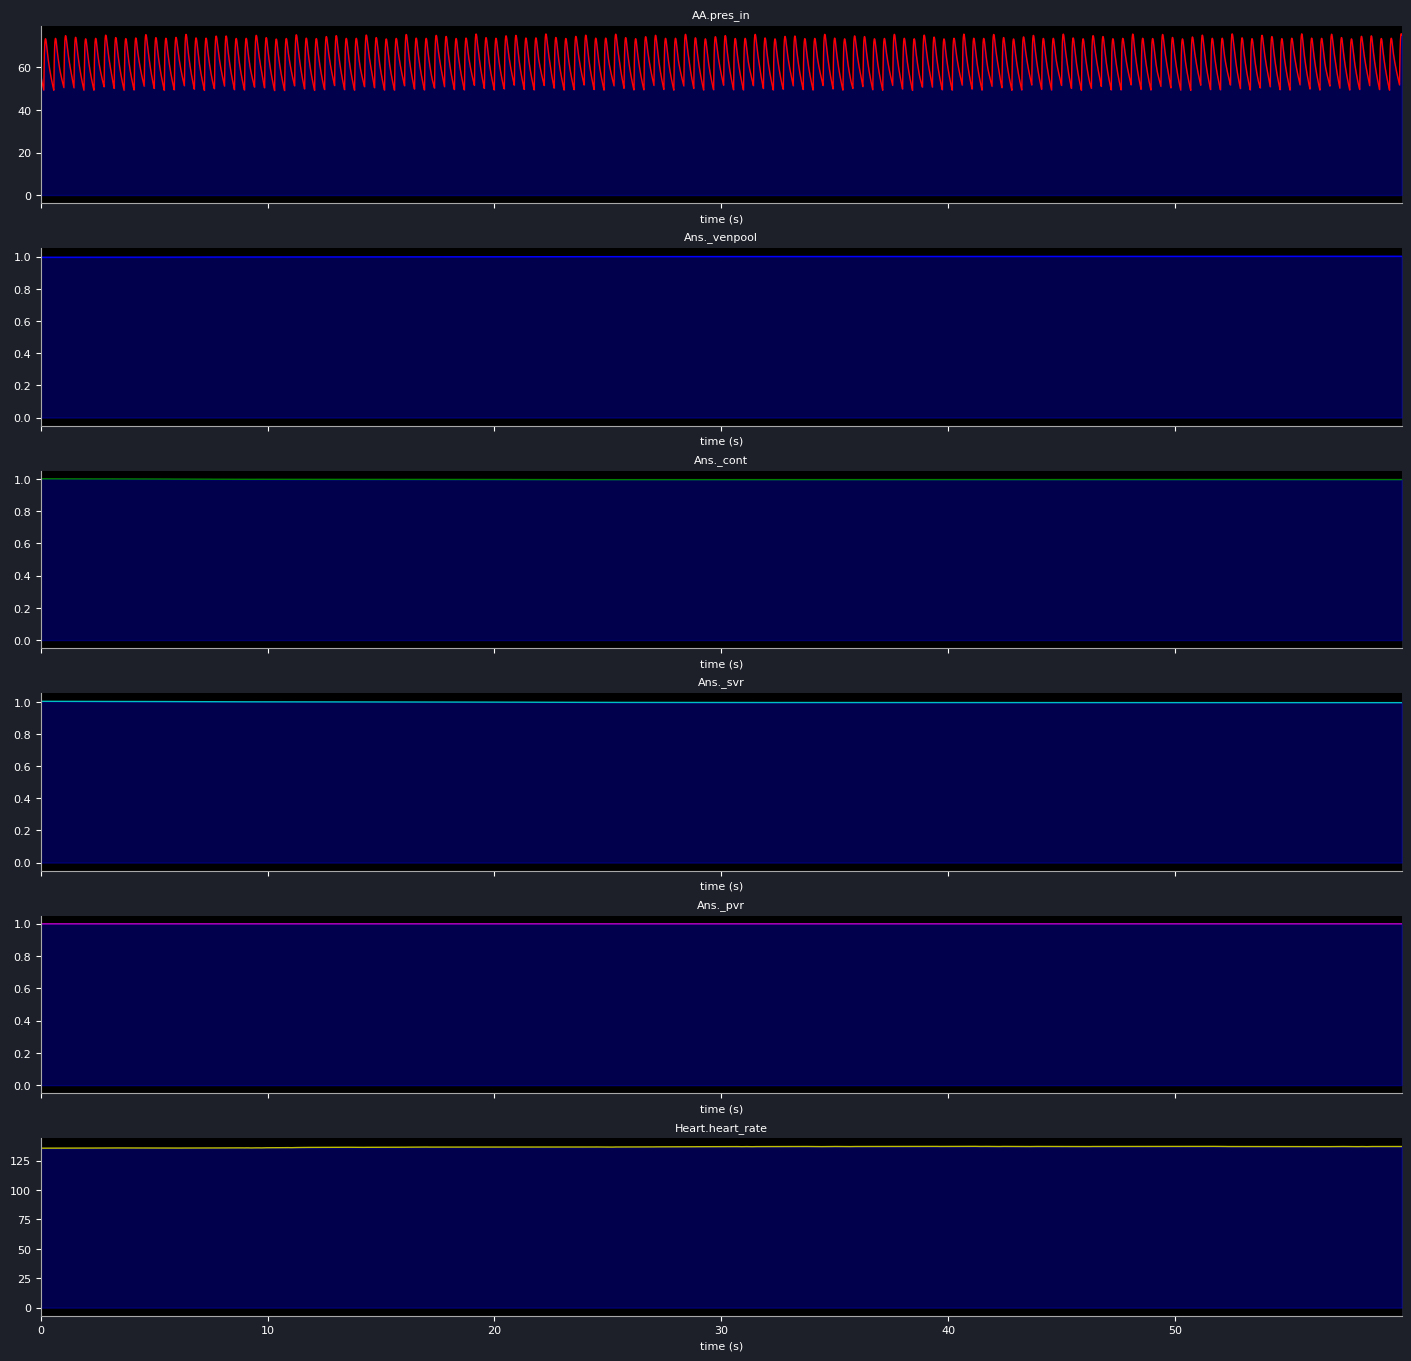


AA.pres_in      : max   75.88271 min   49.15887
Ans._venpool    : max    1.00267 min    0.99637
Ans._cont       : max    1.00174 min     0.9957
Ans._svr        : max    1.00416 min    0.99553
Ans._pvr        : max        1.0 min        1.0
Heart.heart_rate: max  137.16564 min  135.56623


In [2]:
#models["Fluids"].remove_volume(vol=75, in_time=10)
neo.plot_time_graph(["AA.pres_in","Ans._venpool","Ans._cont","Ans._svr", "Ans._pvr", "Heart.heart_rate"], combined=False, sharey=False, time_to_calculate=60, analyze=True, fill=True)

In [ ]:
neo.fastforward(120)

In [6]:
neo.get_vitals()


AA.pres         : max   70.50294, min   44.96334 mmHg
PA.pres         : max   41.61446, min   17.82213 mmHg
IVCI.pres       : max    2.70377, min     1.4135 mmHg


{'heartrate': 136.0750030969292,
 'spo2_pre': 97.87243263992464,
 'spo2_post': 97.57960464288007,
 'abp_systole': 70.50294,
 'abp_diastole': 44.96334,
 'pap_systole': 41.61446,
 'pap_diastole': 17.82213,
 'cvp': 1.843546991,
 'resp_rate': 41.32142092374879,
 'pH': 7.399820124132467,
 'po2': 98.91568419526804,
 'pco2': 42.441618253051644,
 'hco3': 25.961264086743128,
 'be': 0.6989605705060139}